# Loading the necessary libraries

In [36]:
# !pip install -U -q PyDrive
  
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
  
  
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

## Loading the CSV file (Dataset)

In [2]:
link = 'https://drive.google.com/file/d/1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc/view'
  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # to get the id part of the file
# id = link.split("/")[-2]
  
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('titanic-passengers.csv')  
  
titanic = pd.read_csv('titanic-passengers.csv', ";")
titanic

C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
# First 5 rows from the loaded dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


## Cleaning up the dataset (testing purposes delete this before submission)

In [4]:
# cleanColumns = titanic.columns.values[0].split(";")
# cleanColumns.insert(3, "UNKNOWN")
# cleanData = list(zip(
#     list(map(lambda x: x.split(";"), titanic.index.values.tolist())),
#     list(map(lambda x: x[0].split(";"), titanic.values.tolist()))
#     ))
# cleanData = list(map(lambda x: x[0]+x[1], cleanData))


# newTitanic = pd.DataFrame(data=cleanData, columns=cleanColumns)

In [5]:
# First 5 rows after cleaning up the data
# newTitanic.head()

In [6]:
# # Fixing the data types
# newTitanic.PassengerId.astype(int)
# newTitanic.Age.astype(float)
# newTitanic.Fare.astype(float)

# Part1: Preprocessing

## General information about the dataset

In [7]:
titanic.info()
titanic.iloc[:15]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


## Displaying the sum of null values on each column

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Replacing missing data

Replacing missing Age values with mean of the database's age

In [9]:
titanic.Age[titanic.Age.isna()] = titanic.Age.mean()
titanic.isna().sum()

<ipython-input-9-0baba405c488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Age[titanic.Age.isna()] = titanic.Age.mean()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing missing values of Embarked column

In [10]:
# Rows containing missing values in Embarked column
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


Since the titanic database if widely used, and given that we only have to passengers with missing "Embarked" town information, we can simply look them up with a quick Google search and find more information about them.<br>
In this example, I found out the following:<br>
<ul>
<li>
    [Stone, Mrs. George Nelson (Martha Evelyn)](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) : Charlestown<br]>
</li>
<li>
    [Icard, Miss. Amelie](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html): Southampton
</li>
</ul>

In [11]:
titanic.at[396, "Embarked"] = "C"
titanic.at[399, "Embarked"] = "S"

In [12]:
# test to find out if the previous function worked properly
titanic.Embarked.isna().sum()

0

Replacing missing values in Cabin column<br>
Since assigning a some median of Cabin's column would be a mistake, because we have a huge amout of missing values, I opted to give them a new label **"M"** which means *"Missing"*, in order to keep the database unbias.


In [13]:
print('Number of missing values in Cabin column: {}\n'.format(titanic.Cabin.isna().sum()))
titanic.Cabin.fillna("M", inplace=True)

Number of missing values in Cabin column: 687



## Validating the dataset

In [14]:
print(titanic.isna().sum())
titanic.info()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Converting columns into numerical

Either we convert out **categorial** values into **numerical** in order to make it easier for calculations later on, or, we could also create custom functions for our calculation.<br>
I will illustrate how to work with custom functions just for the sake of demonstration, but afterwards, I'll convert the necessary columns into numerical.

In [15]:
titanic.Survived.replace({"Yes": 1, "No": 0}, inplace=True)
titanic.Sex.replace({"male": 1, "female": 0}, inplace=True)

# Visualization

## Impact of **Age**, **Sex** on the survival of an individual

In [16]:
#Delete this function later
# def survival(series, val="Yes"):
#   return series[series == val].count()

# sexAgeTable = titanic.groupby(["Age", "Sex"]).Survived.apply(lambda x: len(np.where(x == "Yes")[0])/( x.size )) # mean working with categorical values
sexAgeSurvived_count = titanic.pivot_table(values="Survived", index=["Age", "Sex"], aggfunc="count", fill_value=0)  # calculating survivals only
sexAgeSurvived_mean = titanic.pivot_table(values="Survived", index=["Age", "Sex"], aggfunc=np.mean, fill_value=0) # mean

sexAgeSurvived_count = sexAgeSurvived_count.reset_index()
sexAgeSurvived_mean = sexAgeSurvived_mean.reset_index()

display(sexAgeSurvived_count.head())
display(sexAgeSurvived_mean.head())

,Age,Sex,Survived
0,0.42,1,1
1,0.67,1,1
2,0.75,0,2
3,0.83,1,2
4,0.92,1,1


,Age,Sex,Survived
0,0.42,1,1.0
1,0.67,1,1.0
2,0.75,0,1.0
3,0.83,1,1.0
4,0.92,1,1.0


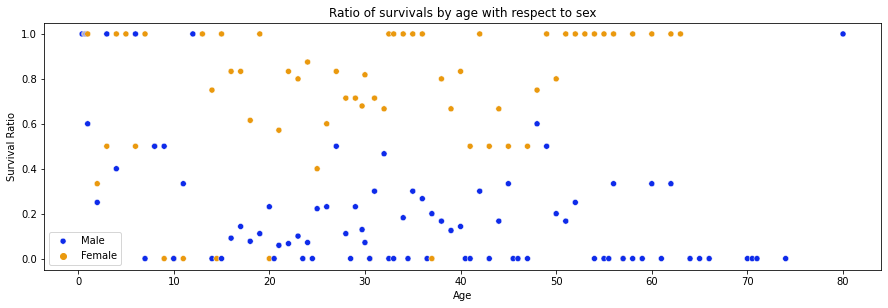

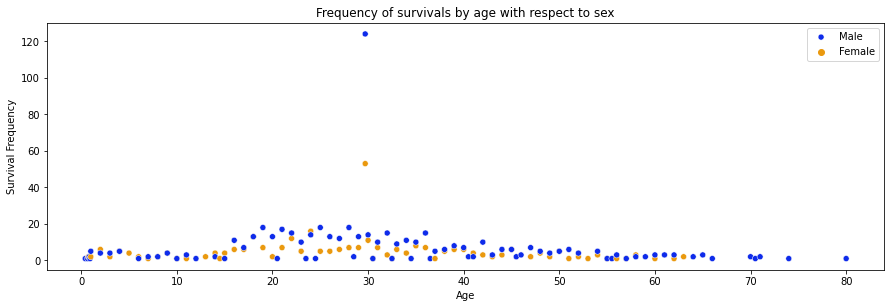

In [17]:
plt.figure(figsize=[15,10]) 
plt.subplot(211)
sns.scatterplot(data=sexAgeSurvived_mean, x="Age", y="Survived", hue="Sex", palette=["#ea990e", "#0e2bea"])
plt.title("Ratio of survivals by age with respect to sex")
plt.ylabel("Survival Ratio")
plt.legend(["Male", "Female"])

plt.figure(figsize=[15,10]) 
plt.subplot(212)
sns.scatterplot(data=sexAgeSurvived_count, x="Age", y="Survived", hue="Sex", palette=["#ea990e", "#0e2bea"])
plt.ylabel("Survival Frequency")
plt.title("Frequency of survivals by age with respect to sex")
plt.legend(["Male", "Female"])

## Picking 2 other features and studying their impact on the survival of an idividual

Here, I wanted to find out whether the size of a family would have an impact on their survival, given the fact that when it crisis, one tends to turn to their family for assistance.<br>
In the following example, I will combine the two columns **"Parch" + "Sibsp"** in order to get the family size, and then I will narrow down the sizes into *4 bins*, because 5 or more members in one family is considered a big family.

Text(0.5, 1.0, 'Mean survival by family size')

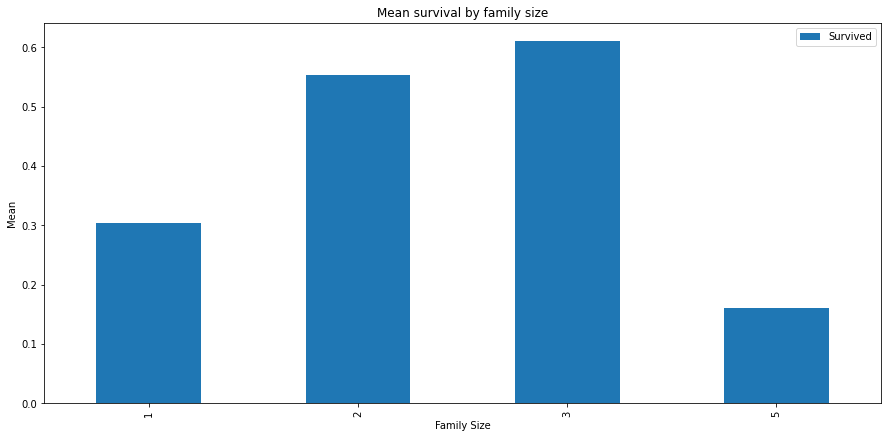

In [18]:
# classEmbarked = titanic.pivot_table(values="Survived", index=["Embarked", "Pclass"], aggfunc="count", fill_value=0)
# classEmbarked = titanic.pivot_table(values="Survived", index=["Parch", "SibSp"], aggfunc="count", fill_value=0)

# familySize = titanic.join(pd.Series(titanic.SibSp+titanic.Parch, name="Family_Size"), how="left").pivot_table(values="Survived", index=["Family_Size"], aggfunc=survival, fill_value=0)
# familySize = titanic.join(pd.Series(titanic.SibSp+titanic.Parch + 1, name="Family_Size"), how="left").pivot_table(values="Survived", index="Family_Size", aggfunc="sum")
# familySize = titanic.join(pd.Series(titanic.SibSp+titanic.Parch + 1, name="Family_Size"), how="left").groupby("Family_Size").Survived.mean()

temp_titanic = titanic.copy()
temp_titanic["Family_Size_bins"] = titanic.join(pd.Series(titanic.SibSp+titanic.Parch + 1, name="Family_Size"), how="left").Family_Size.map(lambda x : 1 if x == 1 else 2 if x == 2 else 3 if x==3 or x==4 else 5)
temp_titanic[["Family_Size_bins", "Survived"]].groupby(by="Family_Size_bins").mean().plot(kind="bar", figsize=[15,7])

plt.xlabel("Family Size")
plt.ylabel("Mean")
plt.title("Mean survival by family size")

The above chart shows the impact of the family size on their survival. The smalled the family, the more likely it is for them not to survive. Ultimately, if the family size is too big (in this case, *bin number 5*) it's less likely for them to make it out alive.<br>

I have also tried studying the imapct of Cabin on the survival of passengers, given the fact that those on the upper decks are more likely to have jumped into lifeboats before those on the lower decks.
However, since we had over 600 of missing values, I'd say that the results wouldn't be complete.

## Correlation

In [19]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 },
        mask=mask
        )

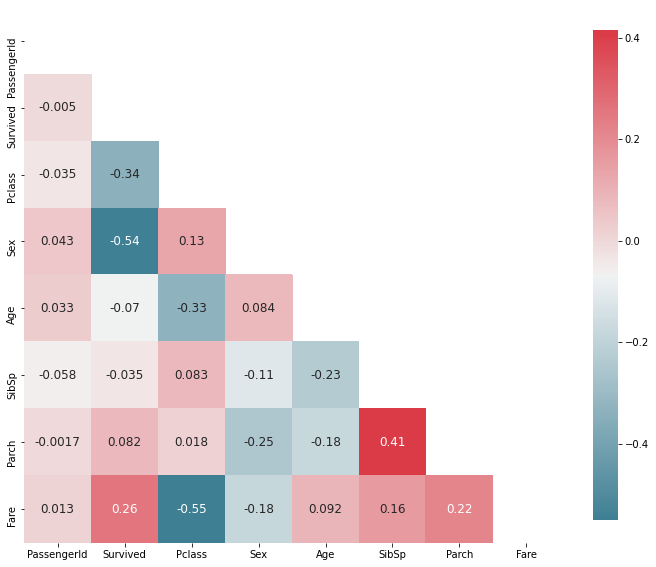

In [20]:
plot_correlation_map(titanic)

The heatmap tableau *(aka: Correlation Matrix)* shows the correlation between numerical features of the dataset which can lead to 3 different results:

*   A positive correlation: when two variables move on the same direction, which indicates the existance of a link between them.
*   A neutral correlation: no link between variables.
*   A negative correlation: where two variables move on opposite direction.

This helps us get a global view of a more or less relationships between variables. 

**Analysis**
---
Let's start by defining the ambigious variables:
*   **Pclass:** socio-economic status (SES)
*   **Parch:** Indicates the number of Parents + Children of given individual
*   **SibSp:** Indicates the number of Siblings + Spouses (if they had any)
*   **Fare:** Passenger fare

The heatmap above displays values ranging from **-0.55 to 0.41**, each value is associated with a color to indicate the correlation between variables. Dark blue color indicates a stong negative correlation while rich red color indicates a strong positive correlation.<br>
Most values are close to 0 except for a few combinations. We can devide these values as follows:

*   Less than -0.33 : A strong negative relationship between features,
*   -0.33 to -0.18 : A weak negative relationship,
*   0.16 to 0.26 : A weak positive relationship,
*   More than 0.26 : A string positive relationship between variables.

We also notice distinct values such as: -0.55, -0.54 and 0.41 which correspond to: (Pcalss, Fare), (Survived, Sex) and (SibSp, Parch) in order.<br>
* **(SibSp, Parch)** are positively related because supposedly a passenger aboarded the titanic with his **two parents, a wife and 2 kids**, he'd have *Sibsp=3* and *Parch=4*, and we also can't have a negative impact because the least each variable could take is 0, so this explains the postive relationship.<br>
* **(Pclass, Fare)** have a negative relationship because those from 3rd class have way lower fare compared to those from 1st class.<br>
* **(Survived, Sex)** showed a strong negative correlation, which seemed odd at first but it explains that the survival of passengers during the titanic incident didn't depend on their gender.<br>

**Conclusion**
---
The correlation matrix is a great way to get an overview of the whole dataset (or at least the numerical features only) and the relationships between features. We now know that neither Sex nor the SES had any influence on whether a passenger survived or not, yet their fare had something to do with it.

## Survival-Pclass

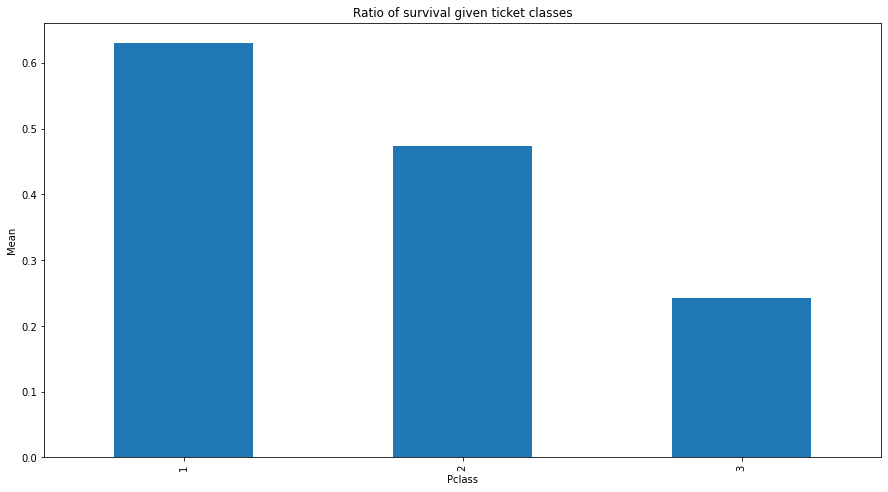

In [21]:
survivalPclass = titanic.groupby(by="Pclass").Survived.mean()
plt.figure(figsize=[15,8])
survivalPclass.plot(kind="bar", )
plt.title("Ratio of survival given ticket classes")
plt.ylabel("Mean")
plt.show()

# Part 2: Preprocessing

## Dropping the Name column after deriving a new column from it called Title 

In [22]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,M,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,M,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,M,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.000000,2,0,3101276,7.9250,M,S
6,576,0,3,"Patchett, Mr. George",1,19.000000,0,0,358585,14.5000,M,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.000000,0,2,2653,15.7417,M,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.500000,0,0,A/5 21173,7.2500,M,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.000000,1,0,SC/AH 3085,26.0000,M,S


In [23]:
# titanic.drop("Title", axis=1, inplace=True)
titanic["Title"] = titanic.Name.map(lambda x: x.split(",")[1].strip().split(" ")[0].strip()[:-1])

Looking for inconsistencies with the new values

In [24]:
print(titanic.Title.unique())

['Mr' 'Mrs' 'Miss' 'Dr' 'Major' 'Don' 'Master' 'Rev' 'Col' 'Mlle' 'Lady'
 'Jonkheer' 'Mme' 'Sir' 'Capt' 'th' 'Ms']


"th" looks weird so, let's investigate.

In [25]:
idx = titanic.Title.to_list().index("th")
# titanic.loc[idx]["Name":"Sex"]
print(titanic.loc[idx])

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                            0
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Title                                                         th
Name: 755, dtype: object


Since she boarded the ship alone, it's most likely that she was not married, so, we'll assign her **"Mlle"** as a title.

In [26]:
titanic.at[idx, "Title"] = "Mlle"

In [27]:
print(titanic.loc[idx])

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                            0
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Title                                                       Mlle
Name: 755, dtype: object


## Visualizing correlation between Title and other features

### Title and Sex

In [54]:
titleSex = titanic.groupby(by=["Title", "Sex"]).Sex.count()
titleSex.name = "Count"
titleSex = titleSex.reset_index()
titleSex.sort_values(by="Title", ascending=True, inplace=True)

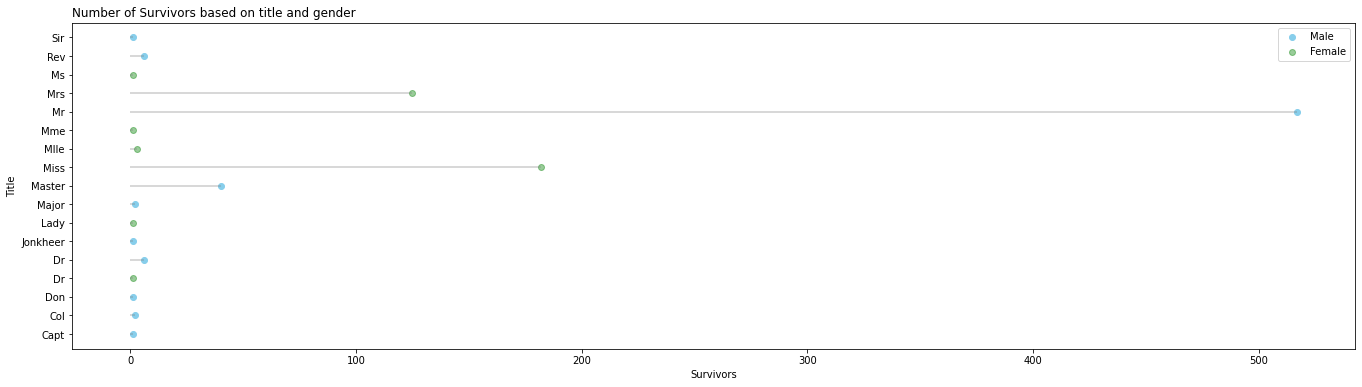

In [56]:
titleSex_range = range(1,len(titleSex.index)+1)
male_range = titleSex[titleSex.Sex ==1].index+1
female_range = titleSex[titleSex.Sex ==0].index+1

plt.figure(figsize=[23,6])
# The horizontal plot is made using the hline function
plt.hlines(y=titleSex_range, xmin=0, xmax=titleSex.Count, color='grey', alpha=0.4)
plt.scatter(titleSex[titleSex.Sex ==1].Count, male_range, color='skyblue', alpha=1, label='Male')
plt.scatter(titleSex[titleSex.Sex ==0].Count, female_range, color='green', alpha=0.4 , label='Female')
plt.legend()
 
# Add title and axis names
plt.yticks(titleSex_range, titleSex['Title'])
plt.title("Number of passengers relative to their title and gender", loc='left')
plt.xlabel('Count')
plt.ylabel('Title')

# Show the graph
plt.show()

### Title and Age

In [132]:
titleAge = titanic.groupby(by=["Title", "Age"]).Age.count()
titleAge.name = "Count"
titleAge

Title  Age 
Capt   70.0    1
Col    56.0    1
       60.0    1
Don    40.0    1
Dr     23.0    1
              ..
Rev    42.0    1
       51.0    1
       54.0    1
       57.0    1
Sir    49.0    1
Name: Count, Length: 205, dtype: int64

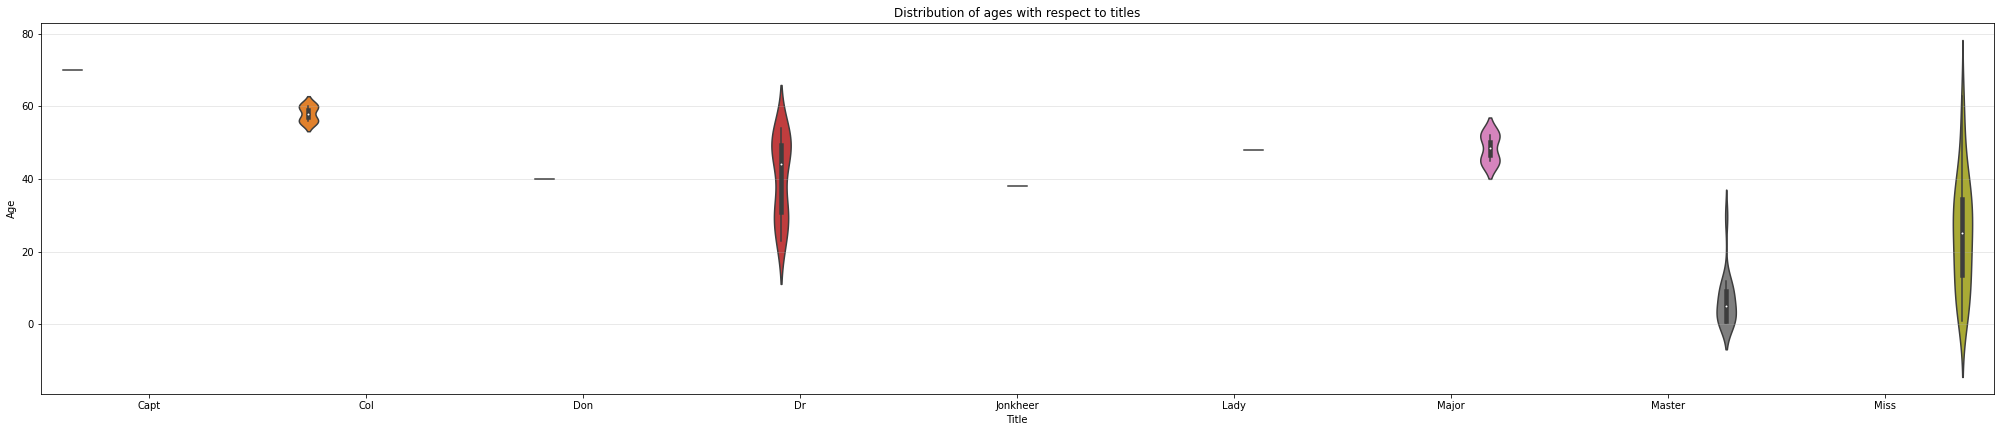

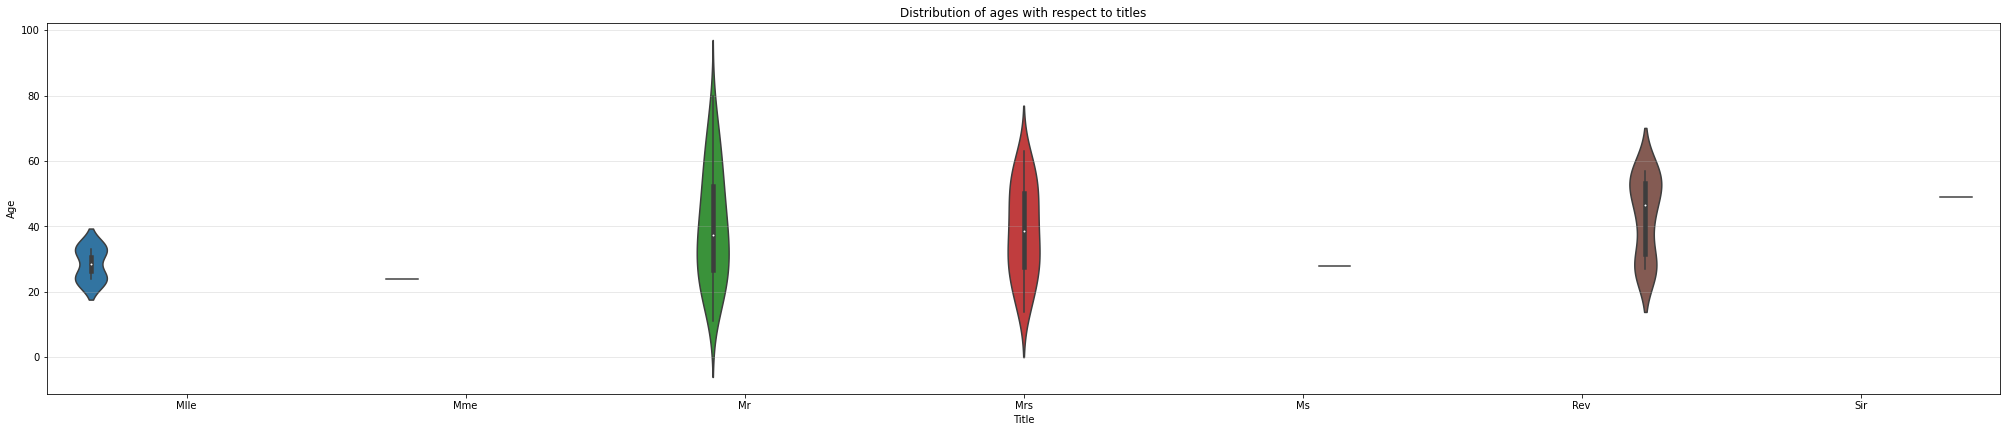

In [157]:
temp = titanic.Title.unique()
temp.sort()
idx1 = temp[int(len(sh)/2)]
idx2 = temp[int(len(sh)/2)+1]

# We split the graph into two because of the big number of titles
plt.figure(figsize=[35, 15])
plt.subplot(211)
sns.violinplot(x="Title", y="Age", hue="Title", data=titleAge.loc[:idx1].reset_index(), cut=2, bw=.5)
plt.title("Distribution of ages with respect to titles")
plt.legend().remove()
plt.grid(axis="y", alpha=0.35)

plt.figure(figsize=[35, 15])
plt.subplot(212)
sns.violinplot(x="Title", y="Age", hue="Title", data=titleAge.loc[idx2:].reset_index(), cut=2, bw=.5)
plt.title("Distribution of ages with respect to titles")
plt.legend().remove()
plt.grid(axis="y", alpha=0.35)

plt.show()

### Title and Fare

## Replacing titles with given dictionary

In [ ]:
Title_Dictionary = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Dr":"Officer",
  "Rev":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Lady":"Royalty",
   "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Miss",
  "Mlle":"Miss",
  "Miss" :"Miss",
  "Ms":"Mrs",
  "Mr":"Mrs",
  "Mrs":"Mrs",
  "Master":"Master"
  }

In [ ]:
trash = titanic.replace(Title_Dictionary)
# trash.Title.unique()
trash